># **Handling Imbalansed datasets**
1. Up sampling -- Increase the points in minority class 
2. Down sampling -- Decrease the data points in minority class

**1. Up sampling**

In [1]:
import pandas as pd
import numpy as np

# Set random seed for data reprodusability
np.random.seed(42)

# Create a DataFrame with Two Classes
n_samples =1000
class_0_ratio = 0.9
n_class_0 =int(n_samples *class_0_ratio)
n_class_1 = n_samples - n_class_0


In [2]:
# create data frame with imbalanced data points
class_0 = pd.DataFrame({
  "feature_1" : np.random.normal(loc=0, scale=1, size=n_class_0),
  "feature_2" : np.random.normal(loc=0, scale=1, size=n_class_0),
  "target" : [0] * n_class_0
})

class_1 = pd.DataFrame({
  "feature_1" : np.random.normal(loc=2, scale=1, size=n_class_1),
  "feature_2" : np.random.normal(loc=2, scale=1, size=n_class_1),
  "target" : [1] * n_class_1
})

In [3]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)
df.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [4]:
df.tail()

,feature_1,feature_2,target
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1
999,1.704520,1.255097,1


In [5]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [6]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [7]:
from sklearn.utils import resample


df_minority_upsampled = resample(df_minority,replace=True, # Sample added with replacement
         n_samples = len(df_majority),
         random_state=42)

In [8]:
df_minority_upsampled.shape

(900, 3)

In [9]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [10]:
df_upsampled.tail()

,feature_1,feature_2,target
952,0.806363,1.094268,1
965,0.337508,2.089581,1
976,1.437832,3.124113,1
942,1.451275,2.269127,1
974,3.310309,1.981291,1


In [11]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

**2. Down Sampling**

In [24]:
n_samples = 1000

# Class ratio
class_0_ratio =0.9
class_1_ratio = 0.1

# Nubver of samlples
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = int(n_samples * class_1_ratio)
print(f"Class 0 : {n_class_0}\nClass 1 : {n_class_1}") 

Class 0 : 900
Class 1 : 100


In [25]:
# create data frame with imbalanced data points
class_0 = pd.DataFrame({
  "feature_1" : np.random.normal(loc=0, scale=1, size=n_class_0),
  "feature_2" : np.random.normal(loc=0, scale=1, size=n_class_0),
  "target" : [0] * n_class_0
})

class_1 = pd.DataFrame({
  "feature_1" : np.random.normal(loc=2, scale=1, size=n_class_1),
  "feature_2" : np.random.normal(loc=2, scale=1, size=n_class_1),
  "target" : [1] * n_class_1
})

In [26]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)
print(df.head())
print(df.tail())

   feature_1  feature_2  target
0  -1.114081   0.946808       0
1  -0.630931   0.055003       0
2  -0.942060   0.422435       0
3  -0.547996  -0.466189       0
4  -0.214150  -0.367204       0
     feature_1  feature_2  target
995   1.450841   4.209856       1
996   3.330432   2.326995       1
997   1.879413   1.164875       1
998   0.659875   3.652913       1
999   1.514321   4.077778       1


In [27]:
# Down sampeling
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [28]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]
len(df_majority),len(df_minority)

(900, 100)

In [29]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority,
                                   replace = False,
                                   n_samples=len(df_minority),
                                   random_state=42) 

In [30]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])
print(df_downsampled.head())
print(df_downsampled.tail())

     feature_1  feature_2  target
900   1.166402   0.512138       1
901   1.320111   0.874814       1
902   1.204030   2.388819       1
903   2.191890   0.826127       1
904   1.839440   3.112634       1
     feature_1  feature_2  target
398   0.880066  -0.715513       0
76   -1.278353   0.320998       0
196  -1.430831   2.710794       0
631   0.457213   0.616664       0
751  -0.766323  -0.384489       0


In [31]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

>Disadvantage of Down-sampling
* Number of instances are reduced which is not good for training a model

>## **SMOTE (Synthetic Minority Over-sampling Technique)**
* SMOTE is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class.
* SMOTE involves generation synthetic instances of the minority class by interpoleting between existing instances. 
>Disadvantages of Upsampling and Advantages of using SMOTE
* Data are duplicated in upsampling technique
* Data are created between two instances in SMOTE

In [32]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,
                    n_features=2,
                    n_redundant =0, 
                    n_clusters_per_class=1,
                    weights=[0.90],
                    random_state=12)

In [33]:
import pandas as pd

df1 = pd.DataFrame(X,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])
final_df = pd.concat([df1,df2],axis=1)
final_df[:5]

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [34]:
final_df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

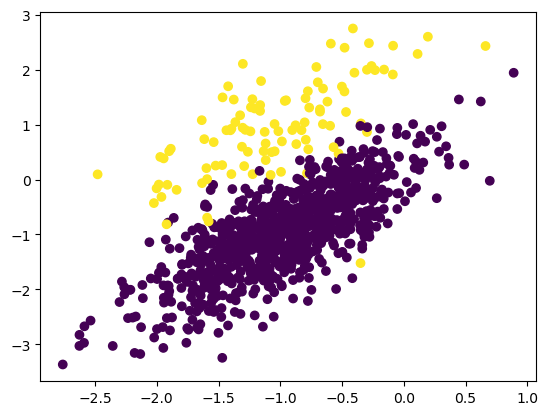

In [35]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target']);

In [36]:
X = final_df.drop('target',axis=1)
y = final_df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
print(f"Training score: {clf.score(X_train,y_train)}")
print(f"Test score: {clf.score(X_test,y_test)}")

from sklearn.metrics import accuracy_score,classification_report
print(f"Accuracy_score: {accuracy_score(y_test,y_preds)}")
print(f"Classification Report :\n{classification_report(y_test,y_preds)}")

Training score: 1.0
Test score: 0.976
Accuracy_score: 0.976
Classification Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       222
           1       0.96      0.82      0.88        28

    accuracy                           0.98       250
   macro avg       0.97      0.91      0.94       250
weighted avg       0.98      0.98      0.98       250



In [37]:
from imblearn.over_sampling import SMOTE
# Transform the dataset
oversample=SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [38]:
X.shape

(1800, 2)

In [39]:
y.shape

(1800,)

In [40]:
len(y[y==0]),len(y[y==1])

(900, 900)

In [41]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=["target"])
oversampled_df = pd.concat([df1,df2],axis=1) 

In [42]:
oversampled_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


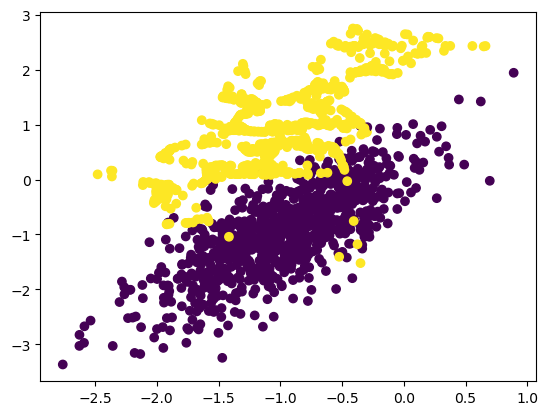

In [43]:
plt.scatter('f1','f2',c="target",data=oversampled_df);

In [44]:
X = oversampled_df.drop('target',axis=1)
y = oversampled_df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
print(f"Training score: {clf.score(X_train,y_train)}")
print(f"Test score: {clf.score(X_test,y_test)}")

from sklearn.metrics import accuracy_score,classification_report
print(f"Accuracy_score: {accuracy_score(y_test,y_preds)}")
print(f"Classification Report :\n{classification_report(y_test,y_preds)}")


Training score: 1.0
Test score: 0.9733333333333334
Accuracy_score: 0.9733333333333334
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       228
           1       0.97      0.97      0.97       222

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [47]:
import pickle as pkl
with open('linear_regression_model.pkl','wb') as file:
  pkl.dump(clf,file)


In [48]:
with open('linear_regression_model.pkl','rb') as file:
  model = pkl.load(file)

model

RandomForestClassifier()